In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib
import matplotlib.pyplot as plt

from ipywidgets import interact, FloatSlider, IntSlider

import io

from tqdm import tqdm_notebook as tqdm

In [2]:
import os
import seaborn as sns
sns.set(style="ticks", palette="muted", rc={"xtick.bottom" : True, "ytick.left" : True})
plt.style.use(os.environ['SCRIPTS_DIR'] + '/matplotlibrc')

In [3]:
DF = pd.read_table('LOGS/history.data', skiprows=5, sep='\s+')
DF

,model_number,star_age,star_mass,log_abs_mdot,log_dt,num_zones,log_max_residual,log_residual_norm,num_solver_iterations,rel_E_err,...,center_c12,center_n14,center_o16,center_ne20,surface_c12,surface_o16,total_mass_h1,total_mass_he4,v_div_csound_surf,num_retries
0,31,2.371898e+03,0.000925,-99.0,2.570424,443,-9.310504,-11.821354,4,2.051274e-13,...,0.003447,0.00101,0.009381,0.002085,0.003447,0.009381,0.000662,0.000215,8.935072e-10,0
1,32,2.818176e+03,0.000925,-99.0,2.649605,443,-9.334903,-11.828400,2,2.452939e-13,...,0.003447,0.00101,0.009381,0.002085,0.003447,0.009381,0.000662,0.000215,-1.364529e-09,0
2,34,3.996350e+03,0.000925,-99.0,2.807968,443,-9.224135,-11.770730,2,2.275736e-13,...,0.003447,0.00101,0.009381,0.002085,0.003447,0.009381,0.000662,0.000215,-1.356601e-09,0
3,36,5.692921e+03,0.000925,-99.0,2.966330,443,-9.255808,-11.795986,2,3.732824e-13,...,0.003447,0.00101,0.009381,0.002085,0.003447,0.009381,0.000662,0.000215,-1.341032e-09,0
4,38,8.135982e+03,0.000925,-99.0,3.124693,443,-9.212016,-11.735443,2,8.127930e-13,...,0.003447,0.00101,0.009381,0.002085,0.003447,0.009381,0.000662,0.000215,-1.319119e-09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,214,6.331919e+09,0.000925,-99.0,8.556301,473,-5.391068,-8.430947,5,1.248955e-13,...,0.003447,0.00101,0.009381,0.002085,0.003447,0.009381,0.000662,0.000215,-4.636453e-15,0
93,216,7.117670e+09,0.000925,-99.0,8.606489,474,-5.310469,-8.311548,5,8.831122e-14,...,0.003447,0.00101,0.009381,0.002085,0.003447,0.009381,0.000662,0.000215,-4.104973e-15,0
94,218,7.990782e+09,0.000925,-99.0,8.650417,474,-5.349946,-8.280299,5,1.127316e-13,...,0.003447,0.00101,0.009381,0.002085,0.003447,0.009381,0.000662,0.000215,-3.628630e-15,0
95,220,8.954903e+09,0.000925,-99.0,8.694465,474,-5.445903,-8.348066,5,1.333120e-13,...,0.003447,0.00101,0.009381,0.002085,0.003447,0.009381,0.000662,0.000215,-3.160054e-15,0


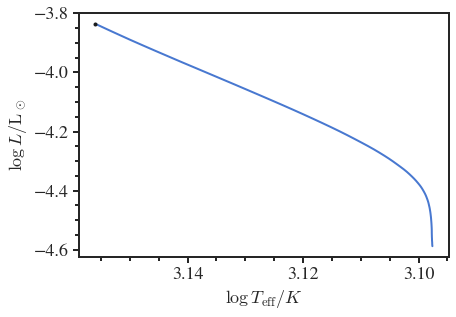

In [4]:
plt.plot(DF['log_Teff'], DF['log_L'])
plt.plot(DF['log_Teff'].values[0], DF['log_L'].values[0], 'k.')
plt.gca().invert_xaxis()
plt.xlabel(r'$\log\,T_{\rm{eff}}/K$')
plt.ylabel(r'$\log\,L/\rm{L}_\odot$')
plt.show()

In [5]:
prof = pd.read_table('LOGS/profile1.data', skiprows=5, sep='\s+')
prof

,zone,logT,logRho,logP,logR,luminosity,logL,velocity,entropy,conv_mixing_type,...,c12_c12,c12_o16,o16_o16,pnhe4,photo,ni56_co56,co56_fe56,other,gradr_sub_grada,logQ
0,1,3.126018,-5.428929,5.252435,-0.692297,1.177154e-04,-3.929167,0.0,10.421577,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.149772,0.319035
1,2,3.131725,-5.417087,5.269979,-0.692370,8.837688e-04,-3.053661,0.0,10.424621,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.673067,0.319463
2,3,3.138622,-5.402259,5.291675,-0.692492,8.012344e-04,-3.096240,0.0,10.427049,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.594212,0.320496
3,4,3.145401,-5.387308,5.313399,-0.692615,7.246781e-04,-3.139855,0.0,10.429865,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.521969,0.321891
4,5,3.152070,-5.372244,5.335149,-0.692740,6.537768e-04,-3.184570,0.0,10.433219,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.457834,0.323616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,720,4.709122,0.016155,12.764824,-3.968220,-3.250159e-16,-12.000000,0.0,10.372110,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-326.613923,2.597912
720,721,4.709122,0.016155,12.764824,-3.975340,-3.458836e-16,-12.000000,0.0,10.372110,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-365.065246,2.597912
721,722,4.709122,0.016155,12.764824,-3.982461,-3.672007e-16,-12.000000,0.0,10.372110,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-407.061990,2.597912
722,723,4.709122,0.016155,12.764824,-3.989581,-3.888532e-16,-12.000000,0.0,10.372110,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-452.756505,2.597912


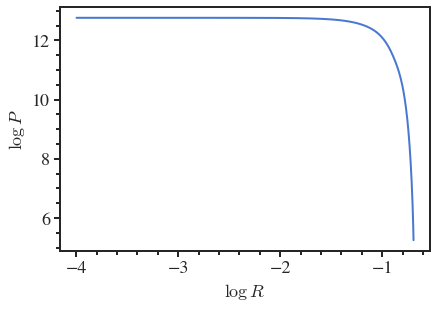

In [6]:
plt.plot(prof['logR'], prof['logP'])
plt.xlabel(r'$\log\,R$')
plt.ylabel(r'$\log\,P$')
plt.show()

In [7]:
index = pd.read_table('LOGS/profiles.index', skiprows=1, sep='\s+', 
                     names=['model_number', 'priority', 'profile_number'])
index

,model_number,priority,profile_number
0,1,2,1
1,30,3,2
2,50,1,3
3,100,1,4
4,150,1,5
5,200,1,6
6,222,3,7


In [8]:
import re
logs = [log for log in os.listdir('LOGS') 
        if re.search('\d', log) is not None]
logs

['profile1.data',
 'profile2.data',
 'profile3.data',
 'profile4.data',
 'profile5.data',
 'profile6.data',
 'profile7.data']

In [9]:
profs = []
mdl_nums = []

for log in logs:
    profile_number = int(log[len('profile'):-len('.data')])
    model_number = index.loc[index['profile_number'] == profile_number]['model_number'].values[0]
    mdl_nums += [model_number]
    #history = DF[DF['model_number'] == model_number]
    prof = pd.read_table('LOGS/' + log, skiprows=5, sep='\s+')
    profs += [prof]

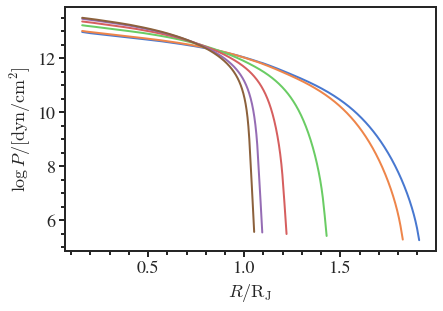

In [10]:
for prof in profs[1:]:
    plt.plot(10**prof['logR'] * 9.731, prof['logP'])

plt.xlabel(r'$R/\rm{R}_J$')
plt.ylabel(r'$\log\,P/[\rm{dyn}/\rm{cm}^2]$')
plt.show()

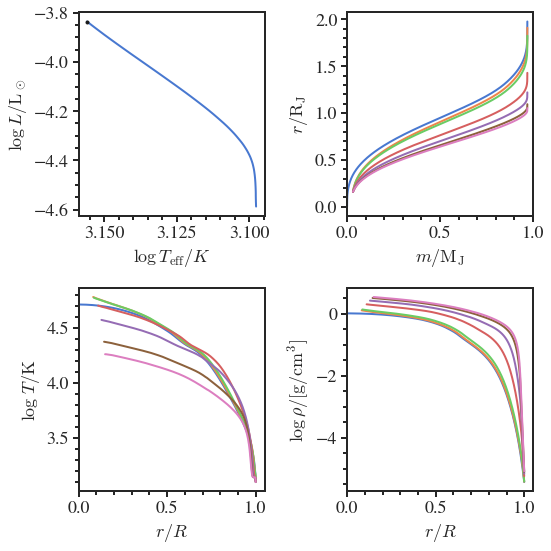

In [11]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)

# HRD
plt.plot(DF['log_Teff'], DF['log_L'])
plt.plot(DF['log_Teff'].values[0], DF['log_L'].values[0], 'k.')
plt.gca().invert_xaxis()
plt.xlabel(r'$\log\,T_{\rm{eff}}/K$')
plt.ylabel(r'$\log\,L/\rm{L}_\odot$')

# mass distribution 
plt.subplot(2,2,2)
for prof in profs:
    plt.plot(prof['mass'] * 1048, 10**prof['logR'] * 9.731)
plt.ylabel(r'$r/\rm{R}_J$')
plt.xlabel(r'$m/\rm{M}_J$')
plt.xlim([0, 1])

# temperature 
plt.subplot(2,2,3)
for prof in profs:
    plt.plot(10**prof['logR'] / np.max(10**prof['logR']), prof['logT'])
plt.xlabel(r'$r/R$')
plt.ylabel(r'$\log\;T/\rm{K}$')
plt.xlim([0, 1.05])

# density 
plt.subplot(2,2,4)
for prof in profs:
    plt.plot(10**prof['logR'] / np.max(10**prof['logR']), prof['logRho'])
plt.xlabel(r'$r/R$')
plt.ylabel(r'$\log\,\rho/[\rm{g}/\rm{cm}^3]$')
plt.xlim([0, 1.05])

plt.tight_layout()
#plt.show()

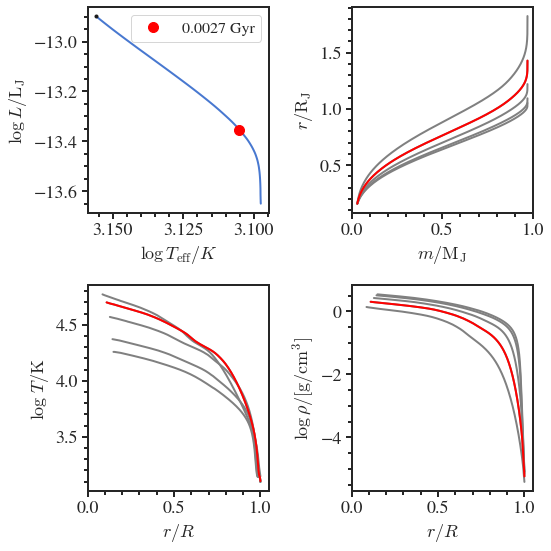

In [12]:
def plot_panels(idx):
    prof_ = profs[idx]
    history = DF[DF['model_number'] == mdl_nums[idx]]
    
    plt.figure(figsize=(8,8))
    plt.subplot(2,2,1)

    # HRD
    plt.plot(DF['log_Teff'], np.log10(10**DF['log_L'] * 8.6710e-10))
    plt.plot(DF['log_Teff'].values[0], np.log10(10**DF['log_L'].values[0] * 8.6710e-10), 'k.')
    plt.gca().invert_xaxis()
    plt.xlabel(r'$\log\,T_{\rm{eff}}/K$')
    plt.ylabel(r'$\log\,L/\rm{L}_J$')
    plt.plot(history['log_Teff'], np.log10(10**history['log_L'] * 8.6710e-10), '.', c='red', ms=20, 
             label='{:.2g}'.format(history['star_age'].values[0]/10**9) + ' Gyr')
    plt.legend()

    # mass distribution 
    plt.subplot(2,2,2)
    for prof in profs[2:]:
        plt.plot(prof['mass'] * 1048, 10**prof['logR'] * 9.731, c='gray')
    plt.ylabel(r'$r/\rm{R}_J$')
    plt.xlabel(r'$m/\rm{M}_J$')
    plt.xlim([0, 1])
    plt.plot(prof_['mass'] * 1048, 10**prof_['logR'] * 9.731, c='red')

    # temperature 
    plt.subplot(2,2,3)
    for prof in profs[2:]:
        plt.plot(10**prof['logR'] / np.max(10**prof['logR']), prof['logT'], c='gray')
    plt.xlabel(r'$r/R$')
    plt.ylabel(r'$\log\;T/\rm{K}$')
    plt.xlim([0, 1.05])
    plt.plot(10**prof_['logR'] / np.max(10**prof_['logR']), prof_['logT'], c='red')

    # density 
    plt.subplot(2,2,4)
    for prof in profs[2:]:
        plt.plot(10**prof['logR'] / np.max(10**prof['logR']), prof['logRho'], c='gray')
    plt.xlabel(r'$r/R$')
    plt.ylabel(r'$\log\,\rho/[\rm{g}/\rm{cm}^3]$')
    plt.xlim([0, 1.05])
    plt.plot(10**prof_['logR'] / np.max(10**prof_['logR']), prof_['logRho'], c='red')

    plt.tight_layout()
    #plt.show()
    

plot_panels(3)

In [13]:
interact(plot_panels, 
         idx=IntSlider(min=2, max=len(profs)-1, value=2, continuous_update=True));

interactive(children=(IntSlider(value=2, description='idx', max=6, min=2), Output()), _dom_classes=('widget-in…